In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from neuron_morphology.swc_io import morphology_from_swc

### This notebook will walk through the expected format for surface_and_layers file. This is a required input for generating layer aligned swc files outside of the Allen Institute's IVSCC Protocol

The surface and layers file is a json which contians x,y coordinates + resolution, for cortical laye
rs, pia and white matter surfaces, and the soma polygon

This data is needed to map a cells laminar distribution to an average laminar template.

In [3]:
# Load an swc file and its corresponding surface and layers json.
morphology = morphology_from_swc("./4493.swc")
with open("./4493.json",'r') as f:
    surface_and_layers = json.load(f)

In [4]:
surface_and_layers.keys()

dict_keys(['layer_polygons', 'pia_path', 'soma_path', 'wm_path'])

In [5]:
# surface_and_layers['layer_polygons'] is a list of dictionaries, each representing the coordinates path for a single cortical layer
surface_and_layers['layer_polygons']

[{'name': 'Layer6a',
  'path': [[402.776, 956.5],
   [508.56, 933.504],
   [587.524, 917.712],
   [788.136, 882.5],
   [914.32, 864.0600000000001],
   [1021.828, 848.352],
   [1189.364, 838.748],
   [1186.068, 988.556],
   [1023.696, 996.224],
   [836.236, 1010.16],
   [683.616, 1024.796],
   [548.424, 1040.128],
   [422.984, 1054.76]],
  'resolution': 1},
 {'name': 'Layer6b',
  'path': [[421.824, 1059.276],
   [547.056, 1046.32],
   [686.3240000000001, 1029.048],
   [832.956, 1013.7520000000001],
   [1024.384, 999.552],
   [1185.032, 991.136],
   [1184.24, 1016.604],
   [1038.332, 1022.7040000000001],
   [875.26, 1031.7640000000001],
   [713.5840000000001, 1047.792],
   [635.532, 1056.8600000000001],
   [537.968, 1070.092],
   [416.016, 1086.1200000000001]],
  'resolution': 1},
 {'name': 'Layer1',
  'path': [[372.38, 357.576],
   [517.904, 334.42],
   [686.264, 321.176],
   [785.188, 311.344],
   [906.48, 298.588],
   [1043.568, 290.116],
   [1155.244, 286.264],
   [1153.704, 367.904]

In [6]:
# surface_and_layers['pia_path'], surface_and_layers['soma_path'] and surface_and_layers['wm_path'] are each single dictionaries 
# contianing the polygon path coordinates. the surface_and_layers['soma_path'] has the added key of center, which is the soma centroid
surface_and_layers['soma_path']

{'name': None,
 'path': [[822.792, 832.192],
  [825.08, 832.788],
  [827.232, 834.732],
  [828.468, 837.0],
  [827.9200000000001, 840.684],
  [826.432, 842.952],
  [822.836, 843.8000000000001],
  [820.2040000000001, 842.288],
  [818.556, 838.808],
  [820.2280000000001, 835.076]],
 'resolution': 1,
 'center': [823.9748, 838.0319999999999]}

## Visualize surface and layers with raw orientation morphology

Text(0.5, 1.0, 'Example Morphology With Surface and Layer Polygons')

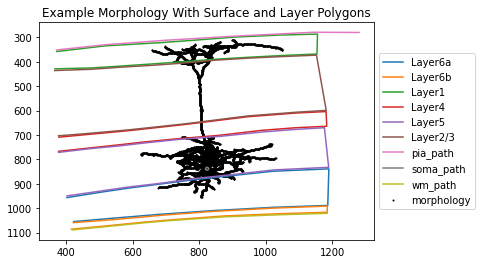

In [7]:
fig,axe=plt.gcf(),plt.gca()


# get morphology coordinates
morphology_coords = np.array([ [n['x'],n['y']] for n in morphology.nodes()  ])

for key,value in surface_and_layers.items():
    
    if key == "layer_polygons":
        
        for layer_dict in value:
            
            layer_polygon_coords = np.array(layer_dict['path']) * layer_dict['resolution']
            layer_name = layer_dict['name']
            
            axe.plot(layer_polygon_coords[:,0],layer_polygon_coords[:,1],label=layer_name)
            
    else:
        
        polygon_label = key
        polygon_coords = np.array(value['path']) * value['resolution']
        axe.plot(polygon_coords[:,0],polygon_coords[:,1],label=polygon_label)

axe.scatter(morphology_coords[:,0],morphology_coords[:,1],s=1,c='k',label='morphology')
axe.legend(bbox_to_anchor=(1.0,0.5), loc="center left")
axe.invert_yaxis()
axe.set_title("Example Morphology With Surface and Layer Polygons")